## EDA - Exploratory Data Analysis 

In [1]:
import numpy as np
# numerical python for stastical purpose
import pandas as pd
# for data engineering - Data preprocessing and Data Visualization
import matplotlib as mpl
# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# advance plots with ease of use 

In [4]:
for lib in [np, pd, mpl, sns]:
    print(f"{lib.__name__}=={lib.__version__}")
#requirements.txt -> stores dependencies

numpy==1.26.4
pandas==2.2.2
matplotlib==3.9.2
seaborn==0.13.2


## Type of Plots 

    Continuous 
                distribution - histogram, line plot (continouse incresing or decresing, time series)
                relationshop - scatter plot, kde plot, rug plot
                    
    Categorical 
                bar chart, pie chart
                

In [7]:
height = np.random.normal(155, 10, 1000).reshape(-1, 1) # 10000, 1
weight = height*0.5 + np.random.normal(10, 2, 1000).reshape(-1, 1) # 1000, 1
# Linear Regression

height[:5]

array([[146.68809398],
       [163.430331  ],
       [147.80854606],
       [139.48191752],
       [140.18180844]])

In [8]:
weight[:5]

array([[86.0681984 ],
       [90.26475831],
       [86.21586457],
       [78.80948949],
       [80.88583987]])

In [10]:
data = pd.DataFrame(np.hstack((height, weight)), columns=["height", "weight"])
data[:5]

,height,weight
0,146.688094,86.068198
1,163.430331,90.264758
2,147.808546,86.215865
3,139.481918,78.809489
4,140.181808,80.885840


In [11]:
data["gender"] = np.random.choice(["male", "female"], 1000)

In [12]:
data.head()

,height,weight,gender
0,146.688094,86.068198,female
1,163.430331,90.264758,male
2,147.808546,86.215865,male
3,139.481918,78.809489,male
4,140.181808,80.885840,female


In [14]:
# BMI -> (0.2*height+0.3*weight)/2
data["BMI"] = (0.2*data["height"] + 0.3*data["weight"])/2
data.head()

,height,weight,gender,BMI
0,146.688094,86.068198,female,27.579039
1,163.430331,90.264758,male,29.882747
2,147.808546,86.215865,male,27.713234
3,139.481918,78.809489,male,25.769615
4,140.181808,80.885840,female,26.151057


## Wide Data 

    no of columns >>> no of rows

## Long Data

    no of rows >>> no of columns


#### long to wide or wide long conversion like for analysis or visualizatio

    pivot_table, group_by, Transform

In [27]:
data.groupby("gender").describe().T
#    transformation     aggregation
# index -> row indexes --> axis-0
# index -> col indexes --> axis-1

gender            female        male
height count  517.000000  483.000000
       mean   154.881120  155.521486
       std     10.272262   10.052248
       min    125.226496  123.987455
       25%    147.986643  149.461588
       50%    154.894652  155.528944
       75%    161.418592  162.568259
       max    189.351288  188.046324
weight count  517.000000  483.000000
       mean    87.473355   87.889300
       std      5.449747    5.537707
       min     69.042739   70.175632
       25%     84.045383   84.295946
       50%     87.694136   87.732885
       75%     90.592691   91.616873
       max    108.889063  108.059254
BMI    count  517.000000  483.000000
       mean    28.609115   28.735544
       std      1.810279    1.804444
       min     22.924530   22.925090
       25%     27.458759   27.669070
       50%     28.694918   28.729742
       75%     29.703444   29.983174
       max     35.268488   35.013521

In [31]:
data.groupby("gender").describe().T.reset_index(level=0)

gender,level_0,female,male
count,height,517.000000,483.000000
mean,height,154.881120,155.521486
std,height,10.272262,10.052248
min,height,125.226496,123.987455
25%,height,147.986643,149.461588
50%,height,154.894652,155.528944
75%,height,161.418592,162.568259
max,height,189.351288,188.046324
count,weight,517.000000,483.000000
mean,weight,87.473355,87.889300


In [19]:
data.tail(10) 
# last 5 rows

,height,weight,gender,BMI
990,160.408754,90.269456,male,29.581294
991,149.335668,85.011655,male,27.685315
992,163.863869,92.162101,male,30.210702
993,153.324478,90.220739,female,28.865559
994,142.636817,84.643877,female,26.960263
995,160.683538,89.566183,male,29.503281
996,138.546693,79.874621,female,25.835862
997,159.827703,93.105454,female,29.948588
998,153.509207,83.452542,male,27.868802
999,168.248106,96.192443,male,31.253677


In [25]:
data["gender"].value_counts()  #Series

gender
female    517
male      483
Name: count, dtype: int64

In [41]:
data.head()

,height,weight,gender,BMI
0,146.688094,86.068198,female,27.579039
1,163.430331,90.264758,male,29.882747
2,147.808546,86.215865,male,27.713234
3,139.481918,78.809489,male,25.769615
4,140.181808,80.885840,female,26.151057


In [51]:
data.shape

(1000, 4)

In [52]:
gender = data["gender"].value_counts().reset_index()
gender["per"] = gender["count"]/data.shape[0] # shape=(1000, 4)
gender

,gender,count,per
0,female,517,0.517
1,male,483,0.483


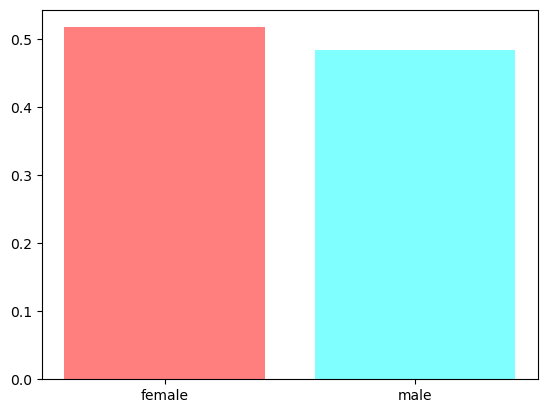

In [54]:
plt.bar(x="gender", height="per", color=["red", "cyan"], alpha=0.5, data=gender)
plt.show()
# cat  frequency (count)

In [79]:
tip = sns.load_dataset('tips')

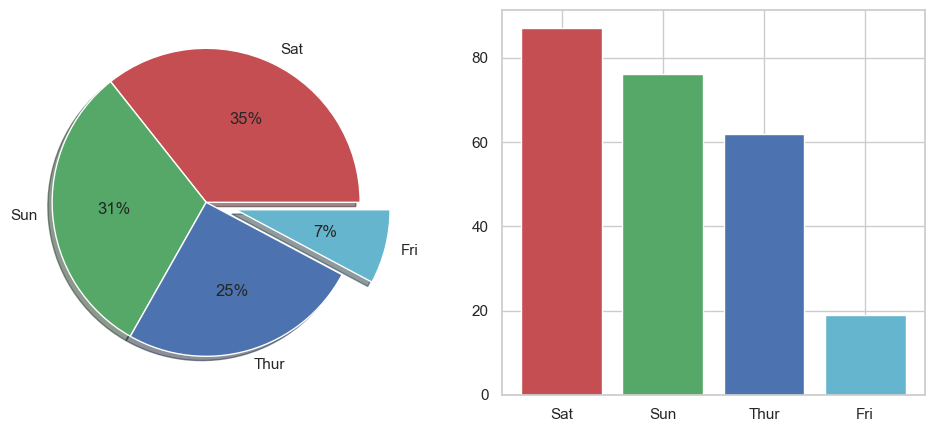

In [106]:
t = tip["day"].value_counts().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

ax1.pie(x="count", labels="day", data=t, colors=['r', 'g', 'b', 'c'], autopct="%d%%", explode=[0, 0, 0, 0.2], shadow=True)
ax2.bar(x="day", height="count", data=t, color=['r', 'g', 'b', 'c'])
plt.show()

([<matplotlib.patches.Wedge at 0x323aa2030>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'female'),
  Text(0.058720029041962135, -1.0984315901271737, 'male')])

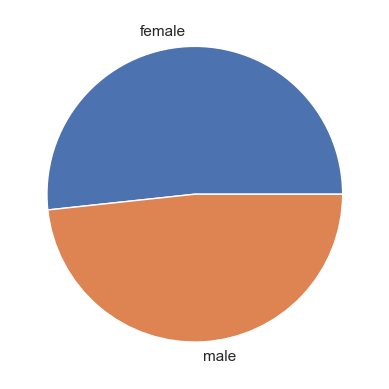

In [77]:
plt.pie(x="count", labels="gender", data=gender)j

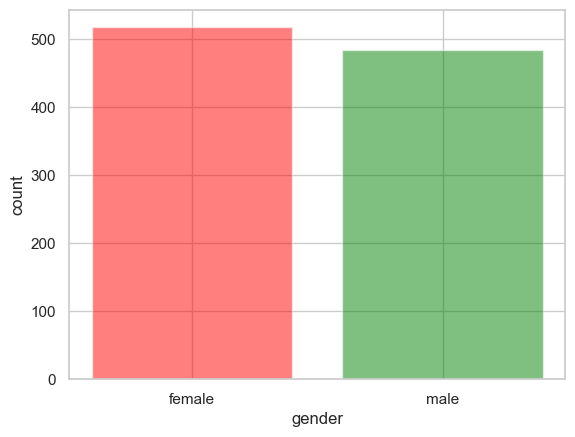

In [70]:
gender = data["gender"].value_counts().reset_index()
plt.bar(x="gender", height="count", color=["red", "green"], alpha=0.5, data=gender)
plt.xlabel("gender")
plt.ylabel("count")
plt.show()
# cat  frequency (count)

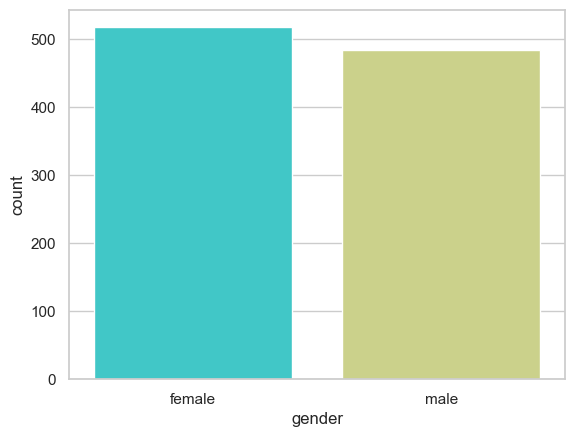

In [76]:
sns.set_theme(style="whitegrid") # R ggplot
sns.countplot(x="gender", hue="gender", data=data, palette="rainbow")
plt.show()

In [107]:
data['height'].describe()

count    1000.000000
mean      155.190417
std        10.166550
min       123.987455
25%       148.676281
50%       155.113301
75%       161.880093
max       189.351288
Name: height, dtype: float64

In [134]:
q1, q2, q3 = data['height'].quantile([0.20, 0.60, 0.90])
print(q1, q2, q3)

146.72022544644935 157.80967669976081 167.7959294220223


<Axes: >

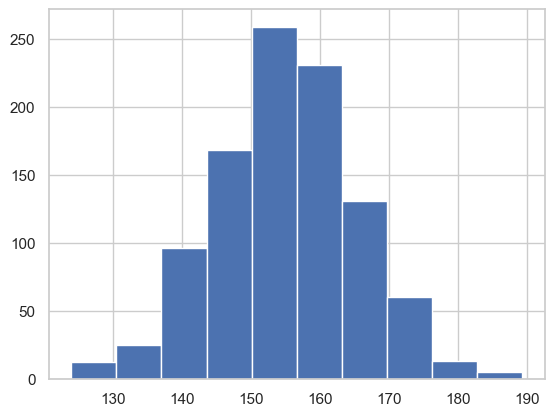

In [135]:
data['height'].hist()

In [136]:
((data['height']>q2)&(data['height']<=q3)).sum()

300

In [138]:
min_q1 = (data['height']<=q1).sum()
q1_q2 = ((data['height']>q1)&(data['height']<=q2)).sum()
q2_q3 = ((data['height']>q2)&(data['height']<=q3)).sum()
q3_max = (data['height']>q3).sum()
# 0.20, 0.60, 0.90 # percentile 20 percentile
ds = pd.DataFrame({
    "class": ["0-20", "20-60", "60-90", "90"], # bins
    "count": [min_q1, q1_q2, q2_q3, q3_max] 
})
ds

,class,count
0,0-20,200
1,20-60,400
2,60-90,300
3,90,100


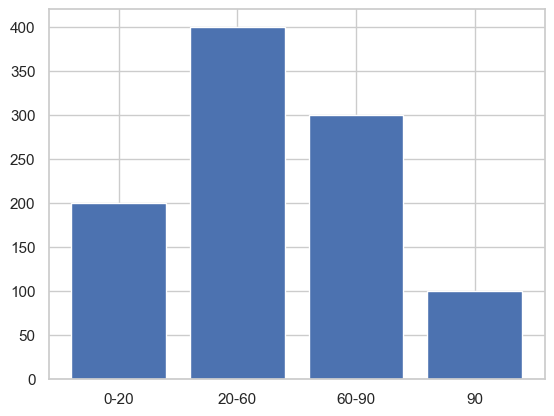

In [140]:
plt.bar(x='class', height='count', data=ds)
plt.show()

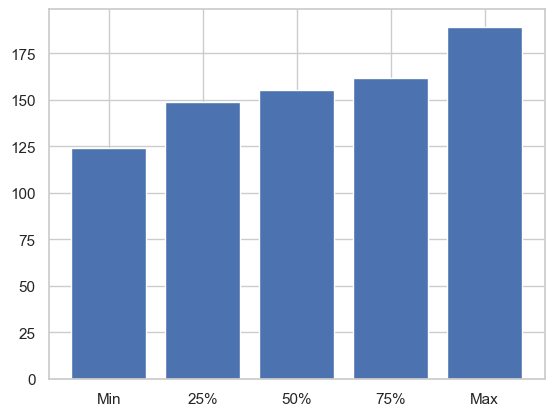

In [112]:
v = np.quantile(data['height'], [0, 0.25, 0.5, 0.75, 1])

plt.bar(x=["Min", "25%", "50%", "75%", "Max"], height=v)
plt.show()

### bins --> classfication bins = classes

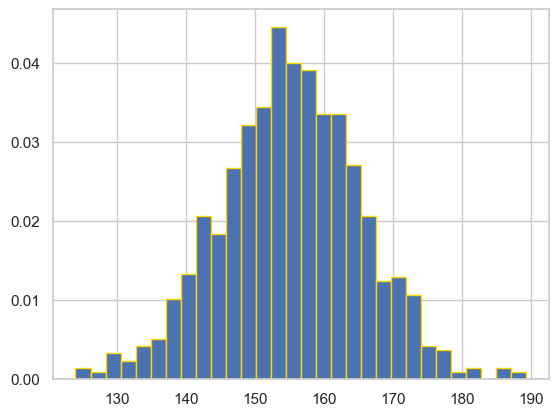

In [155]:
(freq, bins, con) = plt.hist(data["height"], bins=30, density=True, ec='gold', histtype='bar')
# two different data samples
# continous data convert category -> bins -> 30
plt.show()

In [166]:
h = data['height']
h = np.concatenate( (h, np.random.uniform(100, 150, 200)))

(array([  6.,  24.,  83., 186., 287., 259., 112.,  34.,   7.,   2.]),
 array([ 69.04273859,  73.02737102,  77.01200344,  80.99663586,
         84.98126828,  88.96590071,  92.95053313,  96.93516555,
        100.91979797, 104.9044304 , 108.88906282]),
 <BarContainer object of 10 artists>)

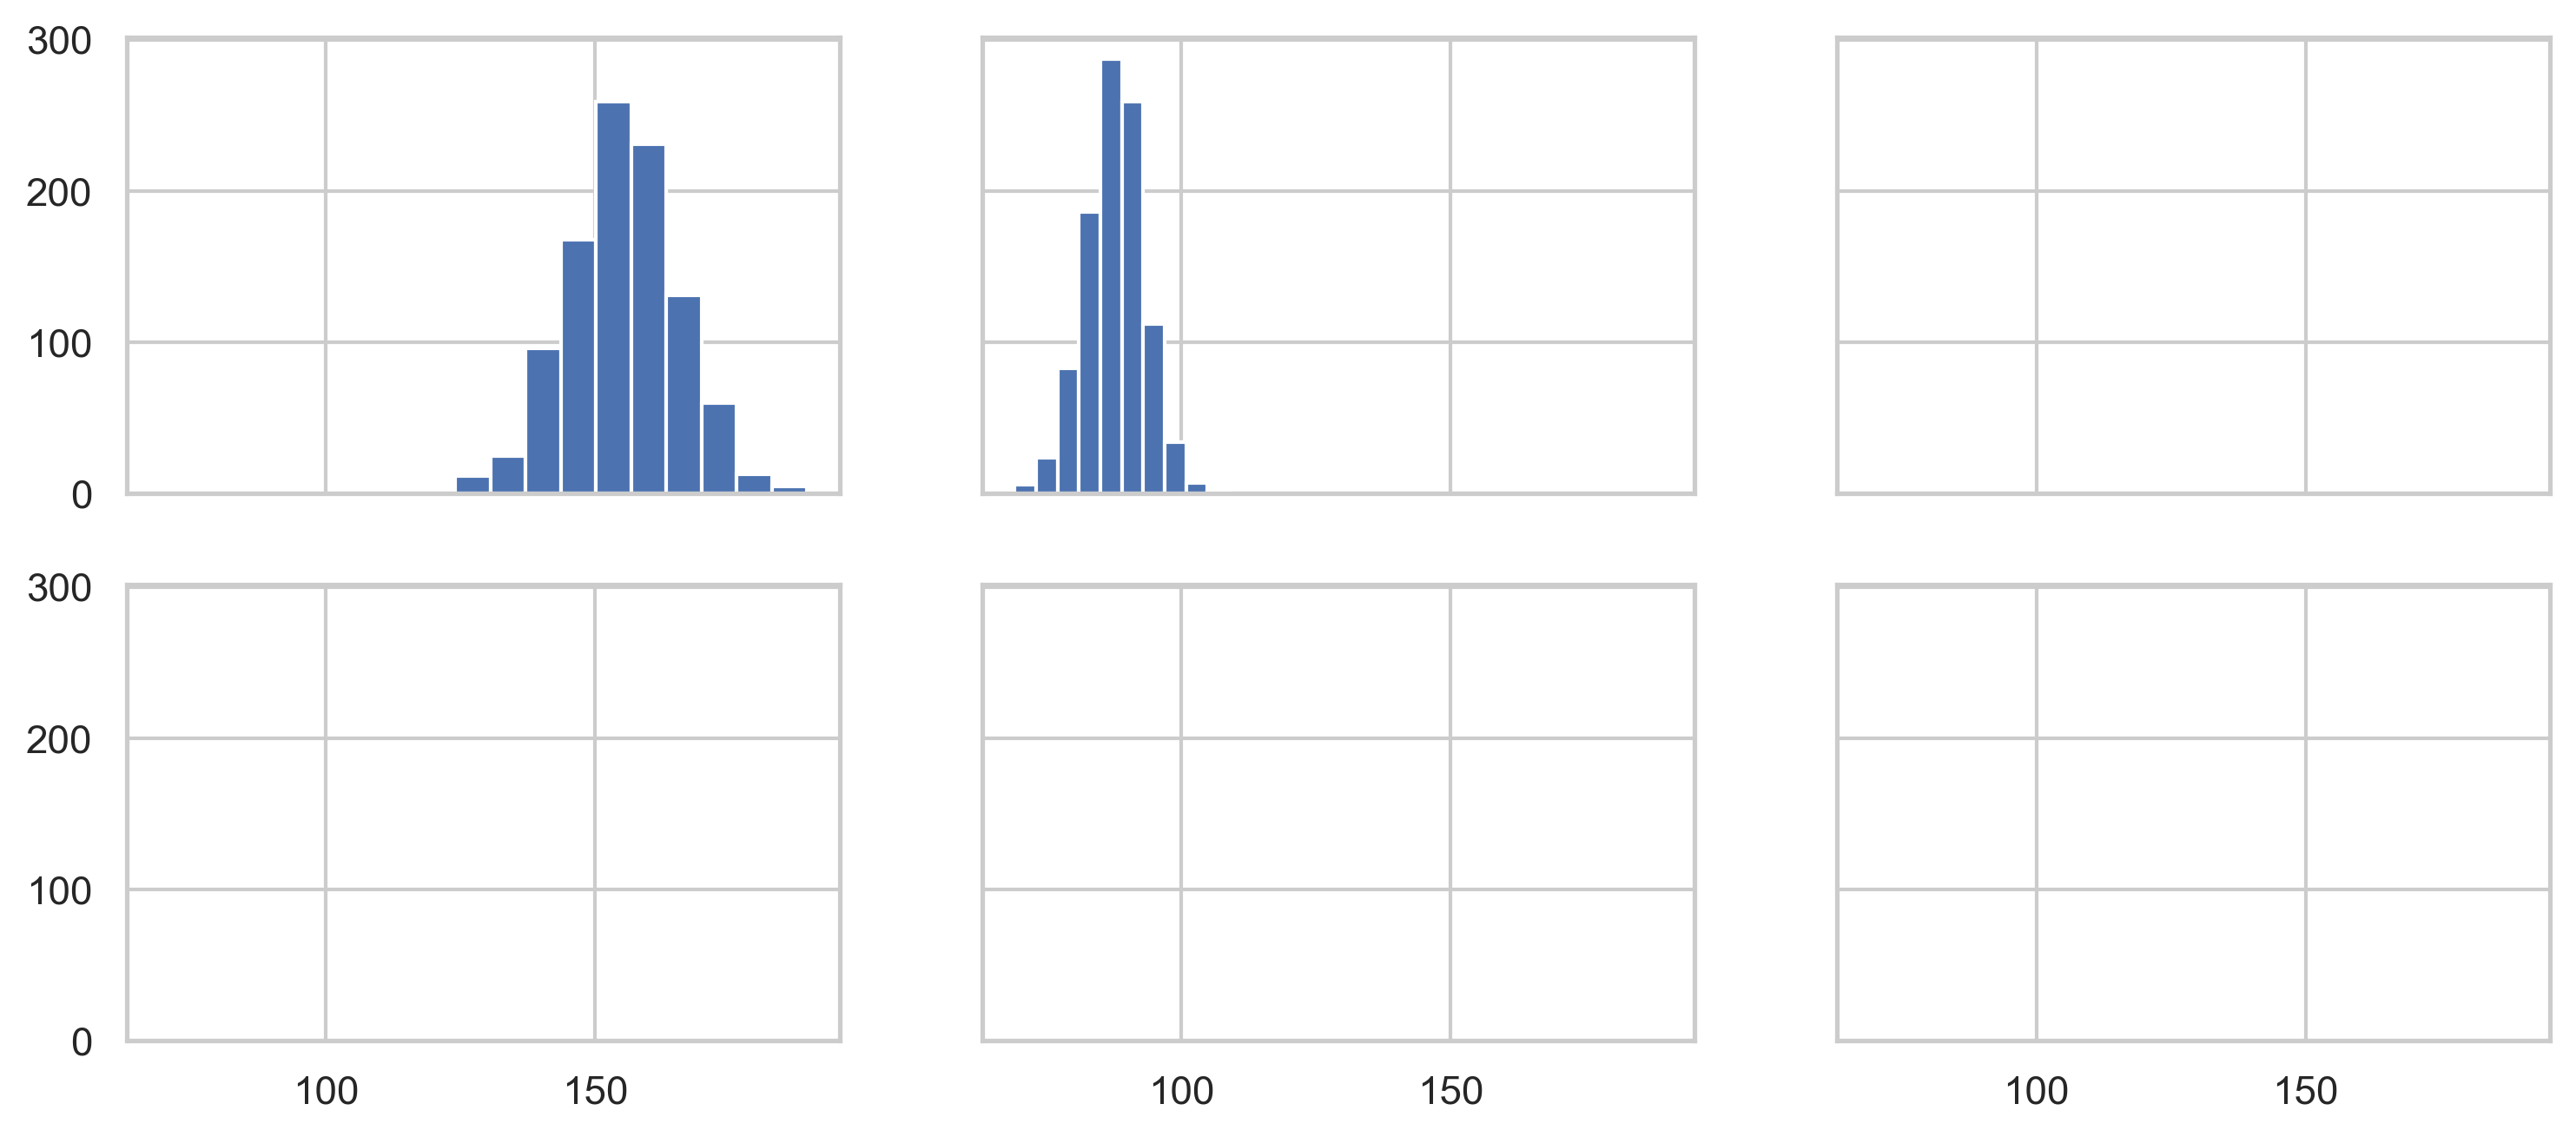

In [176]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(12, 5), dpi=300)

ax1.hist(data.height)
ax2.hist(data.weight)
# 3600, 1500  1080x720 4000x2000

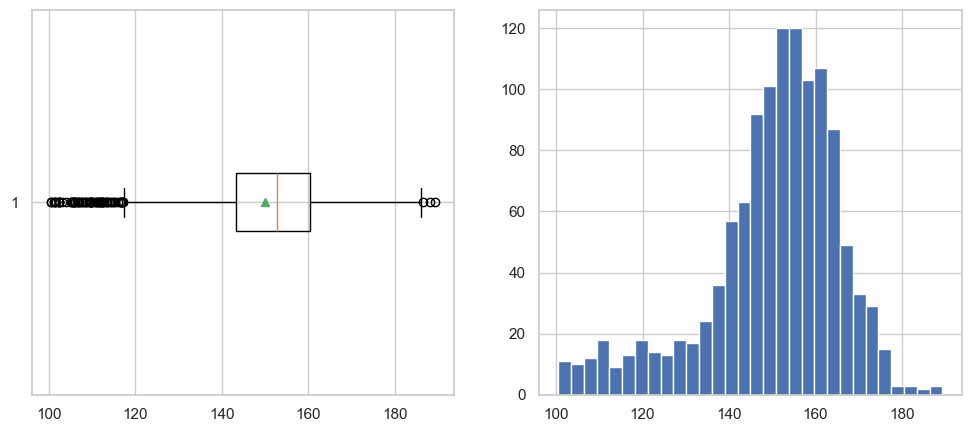

In [180]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.boxplot(h, vert=False, showmeans=True)
ax2.hist(h, bins=30, )
plt.show()


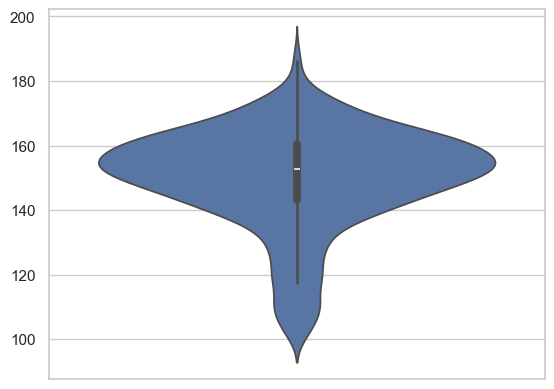

In [189]:
sns.violinplot(h)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


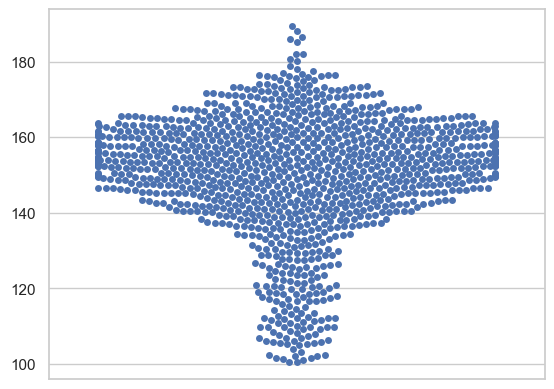

In [190]:
sns.swarmplot(h)
plt.show()

In [191]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


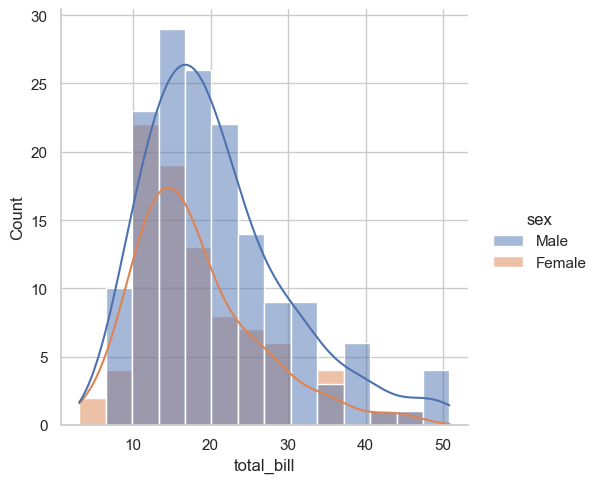

In [211]:
sns.displot(data=tip, x="total_bill", hue="sex", kde=True)
plt.show()

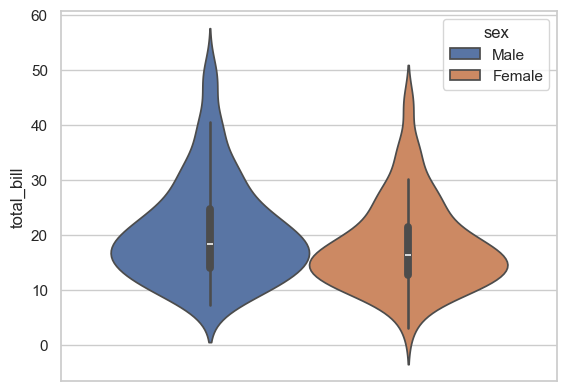

In [207]:
sns.violinplot(y="total_bill", hue="sex", data=tip)
# hist + box --> violin plot
plt.show()

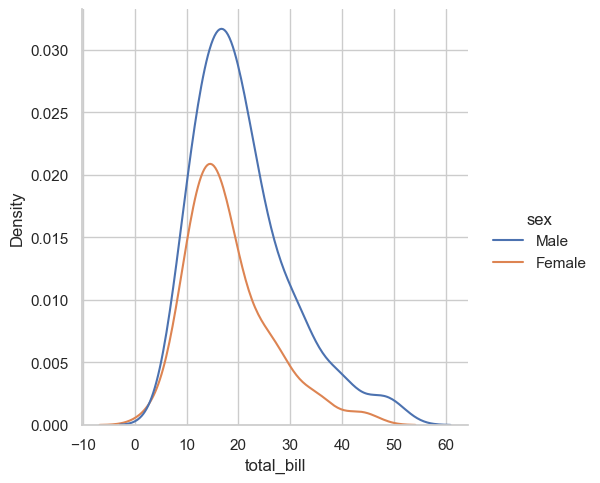

In [209]:
sns.displot(data=tip, x="total_bill", hue="sex", kind="kde")
plt.show()

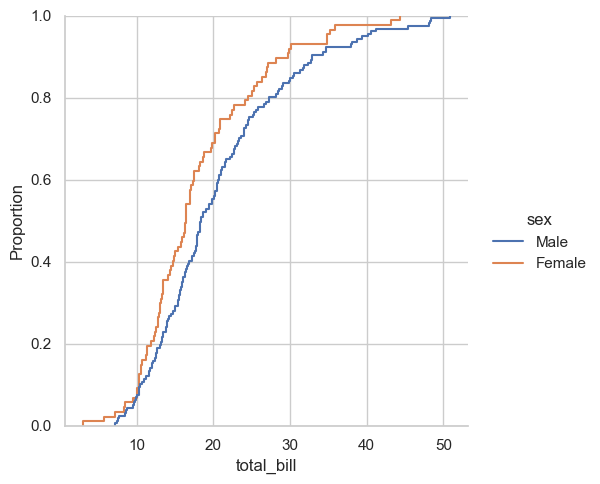

In [210]:
sns.displot(data=tip, x="total_bill", hue="sex", kind="ecdf") # ecdf
plt.show()

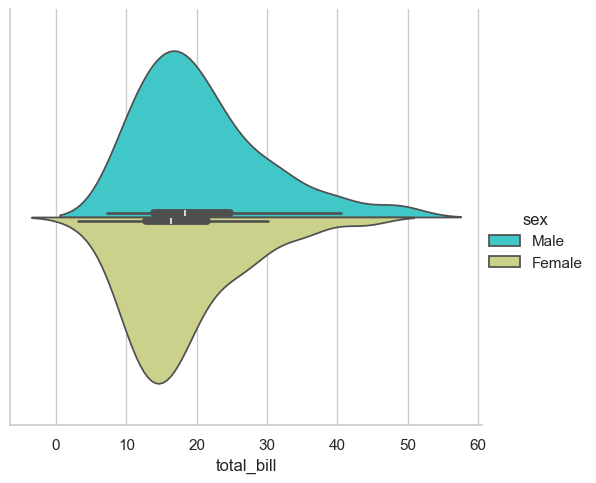

In [218]:
sns.catplot(data=tip, x='total_bill', hue="sex", kind='violin', palette='rainbow', split=True)
plt.show()

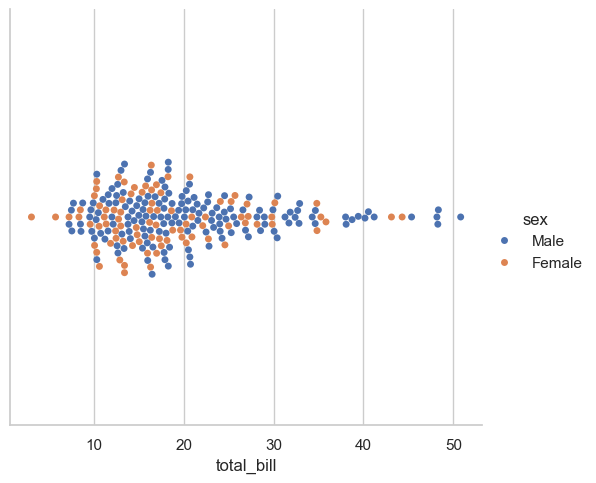

In [221]:
sns.catplot(data=tip, x='total_bill', hue="sex", kind='swarm')
plt.show()

    violin, swarm,  cat plot
    
    kde, histogram -> distribution 

line plot ?

In [222]:
flights = sns.load_dataset("flights")

In [223]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [227]:
d = flights.groupby("year")["passengers"].sum().reset_index()
d

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [231]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

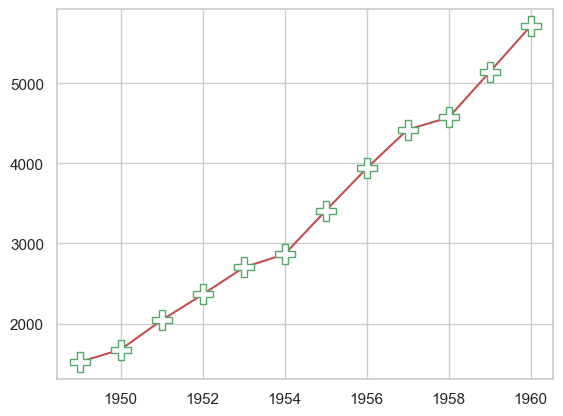

In [244]:
# plt.plot(x, y, fmt)
# linestyle -> -- -> dashed, : -> dotted, -. -> dash dot
# marker -> o, d, ...
# color -> r g b c y m k 
plt.plot("year", "passengers", "Pr-", data=d, ms=15, mfc='w', mec='g') # marker face color (mfc)
plt.show()

In [252]:
data.corr(numeric_only=True)

,height,weight,BMI
height,1.000000,0.928079,0.985486
weight,0.928079,1.000000,0.977823
BMI,0.985486,0.977823,1.000000


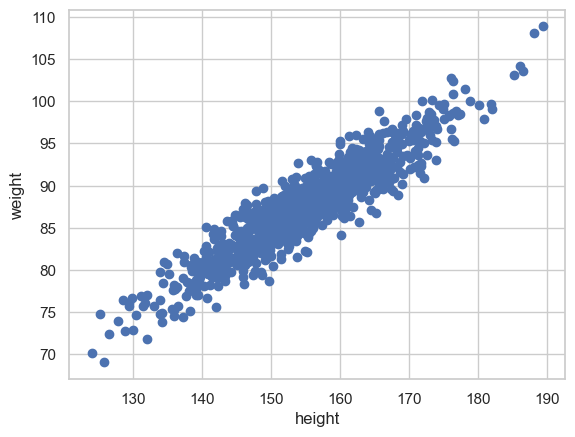

In [250]:
plt.scatter(data['height'], data['weight'])
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [246]:
# relationship 
# correlation coeficient - r -> -1, 1
# linear dependency of data

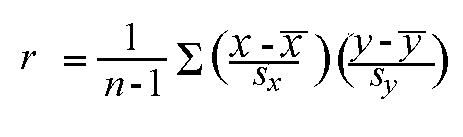

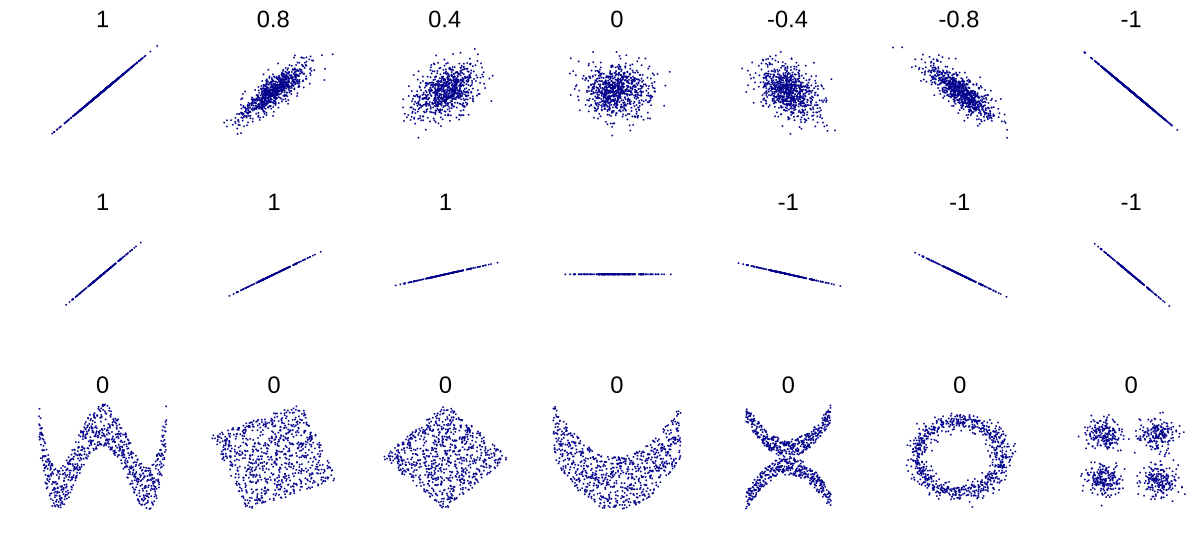

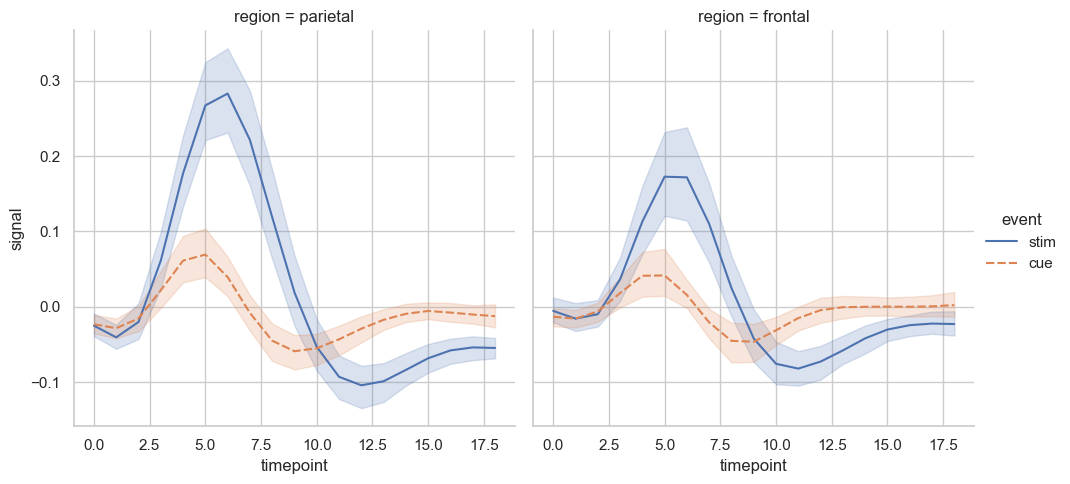

In [255]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)


In [256]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


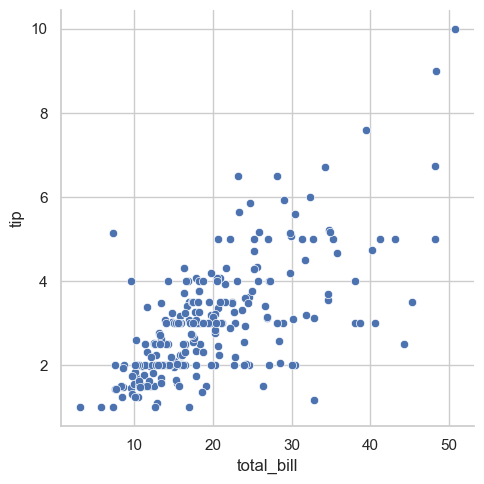

In [259]:
sns.relplot(x="total_bill", y="tip", data=tip)
plt.show()

### ML 